## Case study: Inactivation of factor Va

In [2]:
using DifferentialEquations, Plots
using ModelingToolkit
using ExactODEReduction

### Original model

We consider model [BIOMD0000000365](https://www.ebi.ac.uk/biomodels/BIOMD0000000365) from the BioModels database. We will first load it from file and check that the model is correct by reproducing the [plot from the database](https://www.ebi.ac.uk/biomodels/BIOMD0000000365#Curation).

┌ Info: Loaded an ODE system with 30 states and 9 parameters
└ @ ExactODEReduction c:\data\projects\exactreduction\Exact-reduction-of-ODE-systems\src\parser\parser.jl:427
┌ Info: Preproccessing `ExactODEReduction.ODE` object
└ @ ExactODEReduction c:\data\projects\exactreduction\Exact-reduction-of-ODE-systems\src\ODE.jl:345


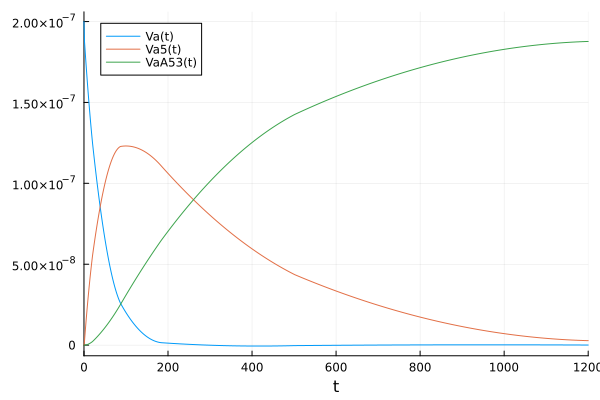

In [3]:
# Loading the model from file into our main ODE datastructure
fname = (@__DIR__) * "/BIOMD0000000365.ode"
ode = load_ODE_fromfile(fname)

# Converting ODE datastructure into an MTK problem and integrating
(mtkprob, ic, p) = ODEtoMTK(ode)
tspan = (0.0, 1200.0) # timespan from the paper
prob = ODEProblem(mtkprob, ic, tspan, p)
sol = solve(prob, Rosenbrock23())
plot(sol, idxs=[(0, 11), (0, 16), (0, 26)])

### Computing reduction

Now we will compute a chain of reductions and study one of them in details.

In [12]:
reds = find_reductions(ode)

[ Info: Global random seed: 1673980961
[ Info: Constructed a set of 72 matrices 39×39 from the system Jacobian
[ Info: Search for a subspace of 72 matrices 39×39
[ Info: Found an invariant subspace by saturating the first unit vector
[ Info: Found [5]-dimensional subspaces in the ambient 39-dimensional space
[ Info: Search for a subspace of 72 matrices 5×5
[ Info: Generating a basis for the algebra
[ Info: Computing the radical
[ Info: Size of the radical is 4
[ Info: Radical is nontrivial, computing the common kernel of radical
[ Info: [4]-dimensional subspaces found
[ Info: Found [4]-dimensional subspaces in the ambient 5-dimensional space
[ Info: Search for a subspace of 72 matrices 4×4
[ Info: Found [1, 2, 3]-dimensional subspaces in the ambient 4-dimensional space
[ Info: Search for a subspace of 72 matrices 34×34
[ Info: Generating a basis for the algebra
[ Info: Computing the radical
[ Info: Size of the radical is 225
[ Info: Radical is nontrivial, computing the common kernel of

A chain of 14 reductions of dimensions 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14.
1. Reduction of dimension 1.
New system:
y1'(t) = 0
New variables:
y1 = APC + LC_APC + Va36_APC + Va3_APC + Va536_APC + Va53_APC + Va56_APC + Va5_APC + VaLCA1_APC + Va_APC
2. Reduction of dimension 2.
New system:
y1'(t) = 0
y2'(t) = 0
New variables:
y1 = APC + LC_APC + Va36_APC + Va3_APC + Va536_APC + Va53_APC + Va56_APC + Va5_APC + VaLCA1_APC + Va_APC
y2 = LC + LC_APC + Va + Va3 + Va36 + Va36_APC + Va3_APC + Va5 + Va53 + Va536 + Va536_APC + Va53_APC + Va56 + Va56_APC + Va5_APC + VaLCA1 + VaLCA1_APC + Va_APC
3. Reduction of dimension 3.
New system:
y1'(t) = 0
y2'(t) = 0
New variables:
y1 = APC + LC_APC + Va36_APC + Va3_APC + Va536_APC + Va53_APC + Va56_APC + Va5_APC + VaLCA1_APC + Va_APC
y2 = LC + LC_APC + Va + Va3 + Va36 + Va36_APC + Va3_APC + Va5 + Va53 + Va536 + Va536_APC + Va53_APC + Va56 + Va56_APC + Va5_APC + VaLCA1 + VaLCA1_APC + Va_APC
y3 = k1
4. Reduction of dimension 4.
New system:
y1'(t) = 

In [16]:
r = reds[5]

Reduction of dimension 5.
New system:
y1'(t) = -y1(t)*y2(t)*y4 + y3(t)*y5
y2'(t) = -y1(t)*y2(t)*y4 + y3(t)*y5
y3'(t) = y1(t)*y2(t)*y4 - y3(t)*y5
New variables:
y1 = APC
y2 = LC + Va + Va3 + Va36 + Va5 + Va53 + Va536 + Va56 + VaLCA1
y3 = LC_APC + Va36_APC + Va3_APC + Va536_APC + Va53_APC + Va56_APC + Va5_APC + VaLCA1_APC + Va_APC
y4 = k1
y5 = k2


Let us now run the simulation for the reduction and plot it.

┌ Info: Preproccessing `ExactODEReduction.ODE` object
└ @ ExactODEReduction c:\data\projects\exactreduction\Exact-reduction-of-ODE-systems\src\ODE.jl:345


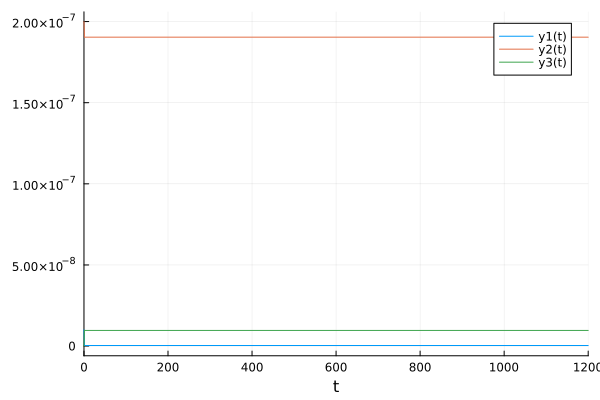

In [17]:
ode_red = new_system(r)
(mtkprob_red, ic_red, p_red) = ODEtoMTK(ode_red)
prob_red = ODEProblem(mtkprob_red, ic_red, tspan, p_red)
sol_red = solve(prob_red, Rosenbrock23())
plot(sol_red)

Interestingly, all the states look nearly constant. Well, let us zoom in:

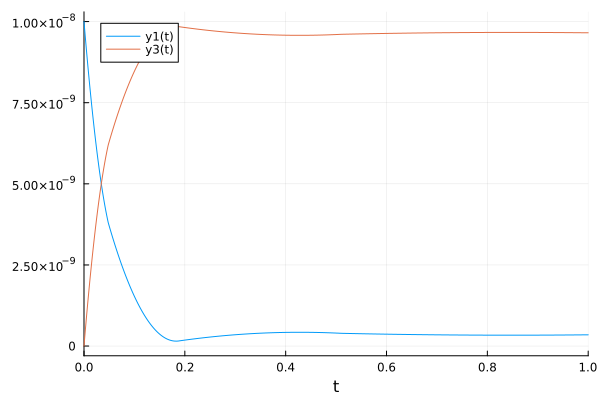

In [18]:
prob_red = ODEProblem(mtkprob_red, ic_red, (0.0, 1.0), p_red) # NOTE the new timespan
sol_red = solve(prob_red, Rosenbrock23())
plot(sol_red, idxs=[(0, 1), (0, 3)])

So the dynamics is non-constant but stabilizes in 0.5 seconds. This contrasts quite a bit with the nontrivial dynamics of the variables appearing in, say, `y2` on the original timespan of 1200 seconds.

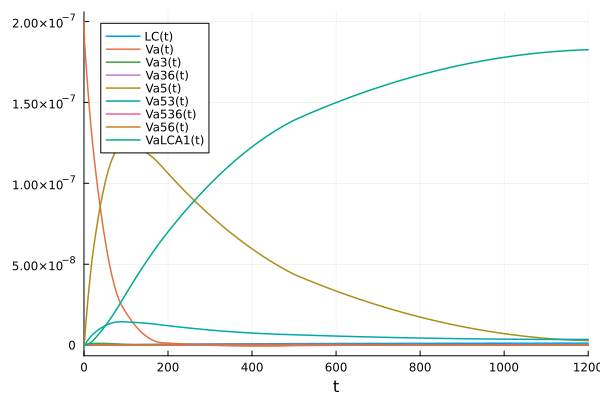

In [33]:
plot(
    sol, 
    idxs = [(0, 9), (0, 11), (0, 12), (0, 13), (0, 16), (0, 17), (0, 18), (0, 21), (0, 28)],
    linewidth = 1.5
)